# Lab: Classification for Prosper Loan Dataset

We are going to classify the prosper loan dataset.  This dataset shows a history of loans made by Prosper.

In [1]:
## Determine if we are running on google colab

try:
    import google.colab
    RUNNING_IN_COLAB = True
except:
    RUNNING_IN_COLAB = False

print ("Running in Google COLAB : ", RUNNING_IN_COLAB)


Running in Google COLAB :  False


In [2]:
%matplotlib inline
import time,datetime
import pandas as pd
import matplotlib.pyplot as plt

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf


## Step 1: Load the Data

Notice we are first loading this into a Pandas dataframe. This is fine for a small dataset, but we will need more than this for a large "at scale" notebook.

In [3]:
## small file, start with this
#datafile = "https://s3.amazonaws.com/elephantscale-public/data/prosper-loan/prosper-loan-data-sample.csv"

## this is a large file
datafile = "../data/prosper-loan/prosper-loan-data.csv.gz"

if RUNNING_IN_COLAB:
    datafile = "https://s3.amazonaws.com/elephantscale-public/data/prosper-loan/prosper-loan-data.csv.gz"


data = pd.read_csv(datafile)
data

,Term,LoanStatus,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,...,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,YearsWithCredit
0,36,1,0.1580,4.0,6.0,Unknown,CO,Self-employed,2.0,True,...,0.0,0.0,0.00,9425,330.43,0,0,0.0,258,13
1,36,1,0.1325,4.0,6.0,Unknown,Unknown,Full-time,19.0,False,...,0.0,0.0,0.00,1000,33.81,0,0,0.0,53,14
2,36,0,0.1435,5.0,4.0,Debt,AL,Employed,1.0,False,...,0.0,0.0,0.00,4000,137.39,0,0,0.0,1,18
3,36,0,0.3177,1.0,5.0,Household,FL,Other,121.0,True,...,0.0,0.0,0.00,4000,173.71,0,0,0.0,10,15
4,36,1,0.2075,4.0,6.0,Unknown,MI,Full-time,36.0,False,...,0.0,0.0,0.00,3000,112.64,0,0,0.0,53,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49719,36,1,0.0679,4.0,6.0,Personal,WA,Full-time,69.0,True,...,0.0,1000.0,847.61,4292,132.11,2,0,0.0,194,42
49720,36,1,0.1899,4.0,6.0,Business,CO,Full-time,22.0,False,...,0.0,14250.0,0.02,2000,73.30,0,0,0.0,25,10
49721,36,1,0.2639,2.0,3.0,Reno,FL,Employed,25.0,False,...,0.0,0.0,0.00,2500,101.25,0,0,0.0,26,6
49722,36,0,0.1110,6.0,8.0,Other,PA,Employed,21.0,True,...,0.0,33501.0,4815.42,2000,65.57,0,0,0.0,22,22


## Step 2 : Explore Data

In [4]:
prosper_clean = data.dropna()

print("Original record count {:,}, cleaned records count {:,},  dropped {:,}"\
      .format(len(data), len(prosper_clean), 
              (len(data) - len(prosper_clean))))
prosper_clean

Original record count 49,724, cleaned records count 49,724,  dropped 0


,Term,LoanStatus,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,...,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,YearsWithCredit
0,36,1,0.1580,4.0,6.0,Unknown,CO,Self-employed,2.0,True,...,0.0,0.0,0.00,9425,330.43,0,0,0.0,258,13
1,36,1,0.1325,4.0,6.0,Unknown,Unknown,Full-time,19.0,False,...,0.0,0.0,0.00,1000,33.81,0,0,0.0,53,14
2,36,0,0.1435,5.0,4.0,Debt,AL,Employed,1.0,False,...,0.0,0.0,0.00,4000,137.39,0,0,0.0,1,18
3,36,0,0.3177,1.0,5.0,Household,FL,Other,121.0,True,...,0.0,0.0,0.00,4000,173.71,0,0,0.0,10,15
4,36,1,0.2075,4.0,6.0,Unknown,MI,Full-time,36.0,False,...,0.0,0.0,0.00,3000,112.64,0,0,0.0,53,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49719,36,1,0.0679,4.0,6.0,Personal,WA,Full-time,69.0,True,...,0.0,1000.0,847.61,4292,132.11,2,0,0.0,194,42
49720,36,1,0.1899,4.0,6.0,Business,CO,Full-time,22.0,False,...,0.0,14250.0,0.02,2000,73.30,0,0,0.0,25,10
49721,36,1,0.2639,2.0,3.0,Reno,FL,Employed,25.0,False,...,0.0,0.0,0.00,2500,101.25,0,0,0.0,26,6
49722,36,0,0.1110,6.0,8.0,Other,PA,Employed,21.0,True,...,0.0,33501.0,4815.42,2000,65.57,0,0,0.0,22,22


In [5]:
print(prosper_clean['LoanStatus'].value_counts())


1    33530
0    16194
Name: LoanStatus, dtype: int64


In [6]:
print(prosper_clean['EmploymentStatus'].value_counts())


Full-time        25016
Employed         18393
Self-employed     3045
Part-time         1060
Other              924
Retired            703
Not employed       583
Name: EmploymentStatus, dtype: int64


In [7]:
print(prosper_clean['ListingCategory'].value_counts())

Debt             19107
Unknown           9335
Other             6272
Business          4449
Reno              3468
Personal          2392
Auto              1596
Student            756
Household          675
Medical            444
Taxes              246
Vacation           225
LargePurchase      224
Wedding            196
Motorcycle         103
Engagement          72
Cosmetic            47
Baby                46
Boat                30
Green               23
RV                  18
Name: ListingCategory, dtype: int64


## Step 3 - Shape Data

### 3.1 - Convert categorical columns to numeric.   
Here let's convert **EmploymentStatus** column

In [8]:
# use pd.factorize on EmploymentStatus, ListingCategory

prosper_clean['EmploymentStatusFactor'] = pd.factorize(prosper_clean['EmploymentStatus'])[0]
prosper_clean['ListingCategoryFactor'] = pd.factorize(prosper_clean['ListingCategory'])[0]

prosper_clean

,Term,LoanStatus,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,...,ProsperPrincipalOutstanding,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,YearsWithCredit,EmploymentStatusFactor,ListingCategoryFactor
0,36,1,0.1580,4.0,6.0,Unknown,CO,Self-employed,2.0,True,...,0.00,9425,330.43,0,0,0.0,258,13,0,0
1,36,1,0.1325,4.0,6.0,Unknown,Unknown,Full-time,19.0,False,...,0.00,1000,33.81,0,0,0.0,53,14,1,0
2,36,0,0.1435,5.0,4.0,Debt,AL,Employed,1.0,False,...,0.00,4000,137.39,0,0,0.0,1,18,2,1
3,36,0,0.3177,1.0,5.0,Household,FL,Other,121.0,True,...,0.00,4000,173.71,0,0,0.0,10,15,3,2
4,36,1,0.2075,4.0,6.0,Unknown,MI,Full-time,36.0,False,...,0.00,3000,112.64,0,0,0.0,53,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49719,36,1,0.0679,4.0,6.0,Personal,WA,Full-time,69.0,True,...,847.61,4292,132.11,2,0,0.0,194,42,1,10
49720,36,1,0.1899,4.0,6.0,Business,CO,Full-time,22.0,False,...,0.02,2000,73.30,0,0,0.0,25,10,1,8
49721,36,1,0.2639,2.0,3.0,Reno,FL,Employed,25.0,False,...,0.00,2500,101.25,0,0,0.0,26,6,2,11
49722,36,0,0.1110,6.0,8.0,Other,PA,Employed,21.0,True,...,4815.42,2000,65.57,0,0,0.0,22,22,2,5


### 3.2 - Select columns to consider

In [9]:
input_columns = [ 'ProsperScore',  'CreditScore', 'StatedMonthlyIncome', 'ListingCategoryFactor', 'EmploymentStatusFactor']
x = prosper_clean [input_columns]
y = prosper_clean[['LoanStatus']]

# print (x.head())

print (y.head())
print('-----')
x

   LoanStatus
0           1
1           1
2           0
3           0
4           1
-----


,ProsperScore,CreditScore,StatedMonthlyIncome,ListingCategoryFactor,EmploymentStatusFactor
0,6.0,640.0,3083.333333,0,0
1,6.0,640.0,1666.666667,0,1
2,4.0,680.0,2416.666667,1,2
3,5.0,700.0,5500.000000,2,3
4,6.0,620.0,3750.000000,0,1
...,...,...,...,...,...
49719,6.0,760.0,10333.333333,10,1
49720,6.0,740.0,2333.333333,8,1
49721,3.0,660.0,4333.333333,11,2
49722,8.0,700.0,8041.666667,5,2


### 3.3 - Create train/test split

In [10]:
from sklearn.model_selection import train_test_split

# supply 'y1' (encoded labels)
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

# backup
x_train_bak = x_train.copy(deep=True)
x_test_bak = x_test.copy(deep=True)

print ("x_train.shape : ", x_train.shape)
print ("y_train.shape : ", y_train.shape)
print ("x_test.shape : ", x_test.shape)
print ("y_test.shape : ", y_test.shape)

x_train.shape :  (39779, 5)
y_train.shape :  (39779, 1)
x_test.shape :  (9945, 5)
y_test.shape :  (9945, 1)


### 3.4 - Scale Data

In [11]:
# Normalize the input features using the sklearn StandardScaler.
# This will set the mean to 0 and standard deviation to 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns])

print ("x_train: before and after")
print(x_train_bak.head())
print('----')
print(x_train.head())

print ('======')
print ('x_test: before / after')
print (x_test_bak.head())
print('---')
print (x_test.head())

x_train: before and after
       ProsperScore  CreditScore  StatedMonthlyIncome  ListingCategoryFactor  \
48861           5.0        780.0             0.000000                      8   
32451           6.0        660.0          4416.666667                      1   
13201           6.0        740.0          3875.000000                      0   
38737           6.0        740.0             0.000000                     12   
37969           4.0        700.0         10000.000000                      5   

       EmploymentStatusFactor  
48861                       4  
32451                       1  
13201                       1  
38737                       1  
37969                       2  
----
       ProsperScore  CreditScore  StatedMonthlyIncome  ListingCategoryFactor  \
48861     -0.624603     1.456078            -0.847932               1.072721   
32451     -0.056654    -0.340266            -0.116836              -0.675334   
13201     -0.056654     0.857297            -0.206498   

/home/ubuntu/apps/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ubuntu/apps/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/ubuntu/apps/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

## Step 4 : Build the Model
Since this is a classifier, here is how we are going to build the neural network
- Neurons in Input layer  = input dimensions (4 here)
- Neurons in hidden layer = ???
- Neurons in Output layer = output classes (binary)
- Output activation is 'sigmoid'

### TODO : Sketch the neural net
- What is the input dimensions
- how many neurons in layers
- how many output neurons

<img src="../assets/images/neural-net-unknown.png" style="width:40%"/>

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________
None


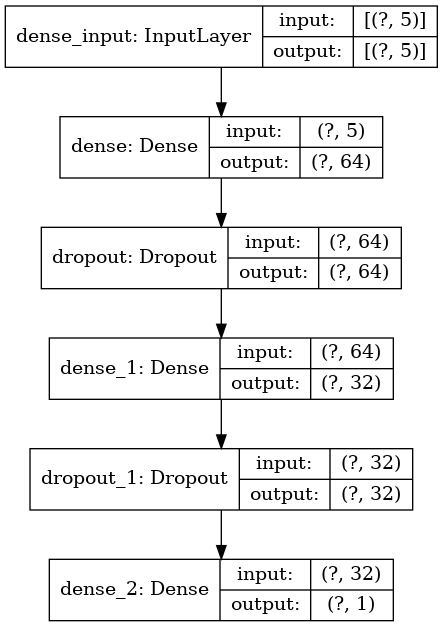

In [12]:
model = tf.keras.Sequential([
    # input layer is implicit
    tf.keras.layers.Dense(64, activation=tf.nn.relu, input_dim=len(input_columns)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
  ])

metrics = [
    tf.keras.metrics.Accuracy(name='accuracy'),
    tf.keras.metrics.TruePositives(name='tp'),
    tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),
    tf.keras.metrics.FalseNegatives(name='fn'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')
  ]


# optimizer = tf.keras.optimizers.RMSprop()
optimizer=tf.keras.optimizers.RMSprop(lr=0.000001)
# optimizer = 'adam'

model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=metrics)

print(model.summary())

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

## Step 5 : Tensorboard

In [13]:
## This is fairly boiler plate code

import datetime
import os

app_name = 'classification-prosper-1' # you can change this, if you like

tb_top_level_dir= '/tmp/tensorboard-logs'
tensorboard_logs_dir= os.path.join (tb_top_level_dir, app_name, 
                                    datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S"))
print ("Saving TB logs to : " , tensorboard_logs_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logs_dir, histogram_freq=1)

# Loading of tensorboard in Colab
if RUNNING_IN_COLAB:
    %load_ext tensorboard
    %tensorboard --logdir $tb_top_level_dir

Saving TB logs to :  /tmp/tensorboard-logs/classification-prosper-1/2020-02-05--18-34-16


## Step 6 : Train

In [14]:
%%time

epochs = 20  

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1,
              callbacks=[tensorboard_callback])

print ("training done.")

training starting ...
Train on 31823 samples, validate on 7956 samples
Epoch 1/20
31823/31823 [==============================] - 9s 277us/sample - loss: 0.7088 - accuracy: 0.0000e+00 - tp: 10643.0000 - fp: 5906.0000 - tn: 4421.0000 - fn: 10853.0000 - precision: 0.6431 - recall: 0.4951 - auc: 0.4474 - val_loss: 0.7038 - val_accuracy: 0.0000e+00 - val_tp: 2415.0000 - val_fp: 1511.0000 - val_tn: 1072.0000 - val_fn: 2958.0000 - val_precision: 0.6151 - val_recall: 0.4495 - val_auc: 0.4128
Epoch 2/20
31823/31823 [==============================] - 5s 167us/sample - loss: 0.7043 - accuracy: 0.0000e+00 - tp: 11519.0000 - fp: 6278.0000 - tn: 4049.0000 - fn: 9977.0000 - precision: 0.6472 - recall: 0.5359 - auc: 0.4494 - val_loss: 0.6987 - val_accuracy: 0.0000e+00 - val_tp: 2715.0000 - val_fp: 1644.0000 - val_tn: 939.0000 - val_fn: 2658.0000 - val_precision: 0.6228 - val_recall: 0.5053 - val_auc: 0.4192
Epoch 3/20
31823/31823 [==============================] - 6s 197us/sample - loss: 0.7001 - accu

## Step 7 : Plot History

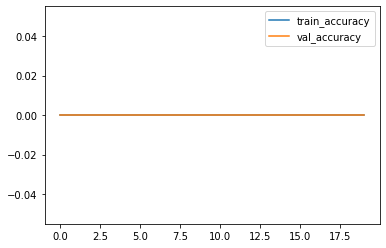

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 : Predict

In [16]:
# predictions = model.predict(x_test)
# predictions

## Use 'predict_classes' instead of 'predict'
predictions = model.predict_classes(x_test)
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

## Step 9 : Evaluate the model

### 9.1 - Print out metrics

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions > 0.5)

0.669884364002011

In [18]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(x_test, y_test, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.2f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy', 'tp', 'fp', 'tn', 'fn', 'precision', 'recall', 'auc']
Metric : loss = 0.64
Metric : accuracy = 0.00
Metric : tp = 6,661.00
Metric : fp = 3,283.00
Metric : tn = 1.00
Metric : fn = 0.00
Metric : precision = 0.67
Metric : recall = 1.00
Metric : auc = 0.55


### 9.2 - Confussion Matrix
Since this is a classification problem, confusion matrix is very effective way to evaluate our model

In [19]:
## plain confusion matrix 

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions, labels = [0,1])
cm


array([[   1, 3283],
       [   0, 6661]])

[]

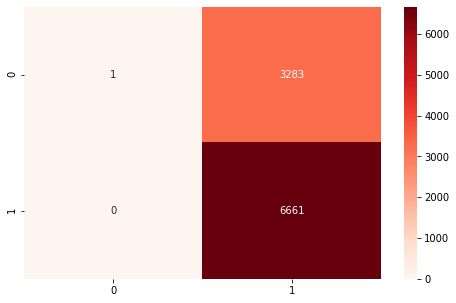

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()

### 9.3 - Metrics calculated from Confusion Matrix

In [45]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(y_test, predictions, output_dict=True))

{'0': {'f1-score': 0.00060882800608828,
       'precision': 1.0,
       'recall': 0.0003045066991473812,
       'support': 3284},
 '1': {'f1-score': 0.8022884673291178,
       'precision': 0.6698511665325825,
       'recall': 1.0,
       'support': 6661},
 'accuracy': 0.669884364002011,
 'macro avg': {'f1-score': 0.4014486476676031,
               'precision': 0.8349255832662912,
               'recall': 0.5001522533495737,
               'support': 9945},
 'weighted avg': {'f1-score': 0.537560872001131,
                  'precision': 0.7788716561361018,
                  'recall': 0.669884364002011,
                  'support': 9945}}


### TODO : Intepret confusion matrix
Instructor will walk you through the matrix.  
Answer these questions
- which class is classified correctly mostly
- which class is classified incorrectly?

## Step 10 : Improve the Model

Inspect the following
- What is the metric 'accuracy' in step 9.1
- And verify this with tensorboard (port 6066)

Most likely, we didn't get a great accuracy.  
How can we improve it?

**Try the following ideas** 

- **Idea-1 : Increase neurons in hidden layer**  
  - In Step-4, increase hidden layer neurons from 8 --> 64  
  - Click 'Kernel --> Restart and Run all Cells'  
  - Hopefully you should see improvement in the accuracy.  
  - Check  accuracy metrics / confusion matrix / tensorboard